<h2><b>Họ và tên:</b> Phan Nguyễn Thành Nhân</h2>
<h2><b>MSSV:</b> 19521943</h2>
<h2><b>Lớp:</b> CS116.M12.KHCL</h2>

# Import lib


In [52]:
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob2

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

from sklearn.neighbors import KNeighborsClassifier

# Step 1: Prepare datasets

In [ ]:
!gdown --id 1_pSovebQfOdhBfznbLfePXhfB_9F6elW
!unzip datasets.zip
!rm datasets.zip

# Step 2: Load datasets

In [49]:
data_path = 'datasets/'
classes = os.listdir(data_path)
classes

['car', 'dog', 'cat', 'tree']

In [68]:
X = []
y = []
all_images = []
for num_class, class_ in enumerate(classes):
  all_images += glob2.glob(os.path.join(data_path + class_, '*.jpg'))
  images = glob2.glob(os.path.join(data_path + class_, '*.jpg'))
  for img in images:
    img = image.load_img(img, target_size=(224, 224))

    X.append(img)
    y.append(num_class)

# Step 3: Feature extraction by VGG16

In [10]:
vgg16 = VGG16(weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [58]:
features = []
for img in X:
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features.append(vgg16.predict(x).flatten())

# Step 4: Read query image

In [59]:
!wget https://vuipet.com/wp-content/uploads/2021/04/cho-corgi-mong-to.jpg -O query.jpg

--2021-12-02 18:16:13--  https://vuipet.com/wp-content/uploads/2021/04/cho-corgi-mong-to.jpg
Resolving vuipet.com (vuipet.com)... 45.119.213.73
Connecting to vuipet.com (vuipet.com)|45.119.213.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72981 (71K) [image/jpeg]
Saving to: ‘query.jpg’

query.jpg           100%[===================>]  71.27K  --.-KB/s    in 0.1s    

2021-12-02 18:16:13 (494 KB/s) - ‘query.jpg’ saved [72981/72981]



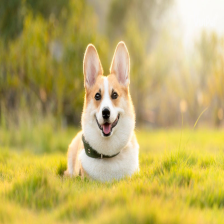

In [60]:
query_img = cv2.imread('query.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(cv2.resize(query_img, (224, 224), interpolation = cv2.INTER_AREA))

# Step 5: Feature extraction of query image

In [61]:
query_img = image.load_img('query.jpg', target_size=(224, 224))
x = image.img_to_array(query_img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

query_feature = vgg16.predict(x).reshape(1,-1)

# Step 6: Find the top k features closest to the query image feature

In [62]:
KNN = KNeighborsClassifier(n_neighbors=3).fit(features, y)

In [63]:
KNN.predict(query_feature)

array([3])

In [64]:
KNN.predict_proba(query_feature)

array([[0.        , 0.33333333, 0.        , 0.66666667]])

# Step 7: Show top K

In [65]:
top_k = KNN.kneighbors(query_feature, return_distance=False)
top_k

array([[ 4, 13, 14]])

In [66]:
KNN.kneighbors_graph(query_feature).toarray()

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.]])

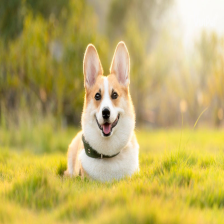

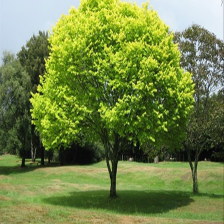

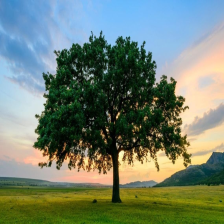

In [70]:
for i in top_k.flatten():
    img = cv2.imread(all_images[i], cv2.IMREAD_UNCHANGED)
    cv2_imshow(cv2.resize(img, (224, 224), interpolation = cv2.INTER_AREA))